# Gapminder World: Population, Age, Life Expectency, Income and Health in the world

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this Analysis of Gapminder data, I will compare different countries and different regions of the world around variables like population, median-age, life expectancy and income in 2015(the last year of available data). I will also look at the distribution of some of this variables among the selected group of countries again in 2015. In addition, and with focus on top 10 countries based on HDI index in 2011, I will take a specific look at the efficiency of the health system in them based on their both governmental and total health spending from 1995 to 2010.
>
These are the main questions that I am trying to answer in this project:
*	How is the distribution of the 'Population', 'Median Age', 'Life Expectancy' and 'Income' over World Countries in 2015? 
*   What is the state of different regions of the world based on 'Median Age', 'Life Expectency',  'Income' and 'HDI'?
*	What is the trend of health expenditure from 1995 to 2010 for top countries in 2011 HDI index? Is there any significant difference with respect to health expenditure among these countries?

In [786]:
# Use this cell to set up import statements for all of the packages that I
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section I'll download the required data sets from Gapminder website. Since the format of this data sets are in **xlsx**, I used Excel spreadsheet to export each table as a csv file. Then I will build Pandas DataFrames based on each csv file. Finally, I will reshape and join 'Population', 'Median Age', 'Income', 'Life Expectancy' and 'HDI' into one inclusive DataFrame. I, Also will add a column to this DataFrame which includes the Gegraphical region that each country belongs to. I will use this DataFrame to answer my first two questions. 
For the third question, I will use a separate DataFrames for 'Government expenditure on health per capita' and 'Total expenditure on health per capita'

### General Properties
> The data is for the following fields:
* **Population**
* **Median Age**: Age that divides a population into two numerically equal groups
* **Income**: Gross Domestic Product per capita
* **Life Expectancy**: Average time a population is expected to live
* **HDI**: Human Development Index which is a summary measure of Education + Income + Life Expectancy
* **Government expenditure on health per capita**: The average health expenditure per person that has been paid by government entities expressed in international dollar
* **Total expenditure on health per capita**: The average health expenditure per person  expressed in international dollar

> Each of the csv files is loaded into a Pandas DataFrame

In [787]:
population_df = pd.read_csv(gap_population_addr)
population_df.head(2)

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562


In [788]:
median_age_df = pd.read_csv(gap_median_age_addr)
median_age_df.head(2)

,Median age,1950,1955,1960,1965,1970,1975,1980,1985,1990,...,2010,2015,2020,2025,2030,2035,2040,2045,2050,Unnamed: 22
0,Afghanistan,18.597,18.462,18.311,18.193,17.994,17.648,17.357,17.091,16.845,...,16.868,17.326,17.810,18.319,18.936,19.775,20.918,22.196,23.522,NaN
1,AFRICA,19.173,18.862,18.434,18.020,17.690,17.524,17.505,17.443,17.541,...,19.676,20.401,21.233,22.245,23.381,24.593,25.851,27.153,28.492,NaN


In [789]:
life_expectancy_df = pd.read_csv(gap_life_expectancy_addr)
life_expectancy_df.head(2)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [790]:
income_df = pd.read_csv(gap_income_addr)
income_df.head(2)

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0


In [791]:
hdi_df = pd.read_csv(gap_hdi_addr)
hdi_df.head(2)

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.23,0.34,0.354,0.363,0.37,0.387,0.398


In [792]:
gov_health_exp_df = pd.read_csv(gap_gov_health_exp_addr)
gov_health_exp_df.head(2)

,Per capita government expenditure on health (PPP int. $),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242622,2.026442,2.509185,4.109661,4.272342,4.908018,4.503357,5.28359,5.182912


In [793]:
total_health_exp_df = pd.read_csv(gap_total_health_exp_addr)
total_health_exp_df.head(2)

,Per capita total expenditure on health (PPP int. $),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.114557,29.684998,32.124328,35.577605,36.167636,40.358763,38.255108,45.565772,44.465952


### Data Reshaping
#### One DataFrame for Population, World_Regions, Median_Age, Life_Expectancy,  Income,  HDI 
> I extract the data for 2015 from previously built Population, Median_Age, Life_Expectancy and Income DataFrames into new ones. Then I will merge these new 2015 Dataframes into one DataFrame.

In [794]:
population_2015_df = pd.DataFrame({'Country': population_df['Total population'],'Population': population_df['2015']})
population_2015_df.head(2)

,Country,Population
0,Abkhazia,NaN
1,Afghanistan,32526562


In [795]:
median_age_2015_df = pd.DataFrame({'Country': median_age_df['Median age'],'MedianAge': median_age_df['2015']})
median_age_2015_df.head(2)

,Country,MedianAge
0,Afghanistan,17.326
1,AFRICA,20.401


In [796]:
life_expectancy_2015_df = pd.DataFrame({'Country': life_expectancy_df['Life expectancy'],'LifeExpect': life_expectancy_df['2015']})
life_expectancy_2015_df.head(2)

,Country,LifeExpect
0,Abkhazia,NaN
1,Afghanistan,53.8


In [797]:
income_2015_df = pd.DataFrame({'Country': income_df['GDP per capita'],'Income': income_df['2015']})
income_2015_df.head(2)

,Country,Income
0,Abkhazia,NaN
1,Afghanistan,1925.0


> The latest available data for Human Development Index (**HDI**) is for 2011. So we will reshape HDI data into new DataFrame just as previous datasets but for 2011 data.

In [798]:
hdi_2011_df = pd.DataFrame({'Country':hdi_df['HDI'], 'HDI':hdi_df['2011']})
hdi_2011_df.head(2)

,Country,HDI
0,Abkhazia,NaN
1,Afghanistan,0.398


> The other data set is Country_Regions.
> region_df is built based on following dataset: www.statvision.com/webinars/countries%20of%20the%20world.xls

> Since the original regions in this dataset were not completely what I intended, they have been slightly modified. 
> Here are the final regions:
* Asia
* China 
* India
* Middle East/North Africa
* Sub-Saharan Africa
* Eastern Europe/Central Asia
* Western Europe
* North America
* Latin America
* Oceania

> **China** and **India** are considered as separate regions because of their exceptional population number!

In [799]:
region_df = pd.read_csv(world_regions_addr)
region_df.head(5)

,Country,Region
0,Afghanistan,Asia
1,Bangladesh,Asia
2,Bhutan,Asia
3,Brunei,Asia
4,Burma,Asia


> Finally, all these separate DataFrames are merged into a new DataFrame: **gapminder_df**

In [800]:
gapminder_df = pd.merge(population_2015_df, region_df, how='left', on='Country')  
gapminder_df = pd.merge(gapminder_df, income_2015_df, how='left', on='Country')  
gapminder_df = pd.merge(gapminder_df, life_expectancy_2015_df, how='left', on='Country')
gapminder_df = pd.merge(gapminder_df, median_age_2015_df, how = 'left', on= 'Country')
gapminder_df = pd.merge(gapminder_df, hdi_2011_df, how = 'inner', on = 'Country')
gapminder_df.head(5)

,Country,Population,Region,Income,LifeExpect,MedianAge,HDI
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,32526562,Asia,1925.0,53.8,17.326,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2896679,Eastern Europe/Central Asia,10620.0,78.0,31.796,0.739
4,Algeria,39666519,Middle East/North Africa,13434.0,76.4,28.311,0.698


#### Health Spending DataFrames for top 10 countries in HDI index
> Here the name of the country field is changed to 'Country',  and it will be set as the  DataFrame's index.

In [801]:
gov_health_exp_df.rename(columns={'Per capita government expenditure on health (PPP int. $)':'Country'}, inplace=True)
gov_health_exp_df.set_index('Country', inplace=True)
gov_health_exp_df.head(2)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242622,2.026442,2.509185,4.109661,4.272342,4.908018,4.503357,5.28359,5.182912


In [802]:
total_health_exp_df.rename(columns={'Per capita total expenditure on health (PPP int. $)':'Country'}, inplace=True)
total_health_exp_df.set_index('Country', inplace=True)
total_health_exp_df.head(2)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.114557,29.684998,32.124328,35.577605,36.167636,40.358763,38.255108,45.565772,44.465952


> A subset of 'total_health_exp_df' is built here for the list of top ten countries with highest number of HDI index in 2011. 

In [803]:
top10_hdi_countries = gapminder_df.sort_values('HDI', axis=0, ascending = False).iloc[:10]['Country']
top10_hdi_total_health_exp_df = total_health_exp_df.loc[top10_hdi_countries, :]
top10_hdi_total_health_exp_df

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,
Norway,2155.135765,2265.338754,2348.468959,2536.162460,2779.856742,3041.967350,3264.552259,3627.776036,3834.437502,4078.671071,4304.132995,4608.371886,4887.828109,5228.935532,5352.690316,5426.078177
Australia,1596.537533,1700.615430,1804.000654,1941.546408,2085.299782,2252.727448,2373.557882,2543.450068,2658.094774,2860.819645,2958.261806,3137.686345,3313.792536,3408.736167,3483.764413,3441.042109
Netherlands,1794.085845,1859.062564,1915.061110,2053.963977,2178.395378,2340.075534,2554.653974,2833.337590,3098.279541,3310.428196,3451.031405,3700.742105,3944.607608,4227.721899,4880.810487,5037.825355
United States,3747.692121,3899.976933,4054.627219,4235.837199,4450.044994,4703.467344,5051.944952,5452.996081,5981.681058,6330.932631,6700.269097,7072.560632,7437.292298,7719.627428,7959.953538,8361.732117
New Zealand,1239.327978,1263.455533,1348.537152,1447.934499,1519.190057,1602.777408,1700.761620,1831.331618,1841.402233,1967.233143,2117.106112,2379.079553,2436.970798,2691.592434,2906.911242,3020.053027
Canada,2054.113249,2055.860409,2150.189447,2309.223698,2416.209728,2519.119611,2732.903261,2871.074975,3058.334645,3210.732294,3449.054315,3673.451360,3849.577809,3995.922838,4314.426611,4403.621980
Ireland,1189.617075,1272.802447,1376.046058,1475.482548,1572.916856,1761.687260,2060.217174,2334.920507,2539.655739,2762.284753,2939.896079,3178.014651,3472.852411,3766.267721,3756.900191,3703.960031
Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,2275.503494,2401.972799,2417.394607,2489.918059,2591.078523,2679.213596,2807.146182,2944.794336,3097.576423,3170.220929,3363.944738,3565.886743,3724.187535,3962.546935,4218.750537,4332.335922


In [804]:
top10_hdi_gov_health_exp_df = gov_health_exp_df.loc[top10_hdi_countries, :]
top10_hdi_gov_health_exp_df

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,
Norway,1730.332212,1832.759793,1909.487530,2084.529094,2295.028066,2509.499900,2727.732690,3028.341474,3209.790303,3408.117250,3594.028752,3860.810914,4110.513162,4407.629301,4501.665159,4552.345610
Australia,1050.153733,1109.587499,1206.754416,1288.328695,1426.123235,1505.317103,1573.243567,1701.817633,1757.273673,1907.698823,1978.657281,2089.244000,2237.121183,2317.713614,2368.727825,2339.679504
Netherlands,1274.576561,1230.293072,1298.726634,1317.528517,1366.134814,1476.116917,1604.515241,1769.668712,1895.252030,1980.616059,2087.840500,2798.850894,2966.257297,3183.538346,3857.818635,3991.237658
United States,1683.124404,1753.840100,1811.228438,1843.058284,1916.391915,2031.765381,2231.182833,2404.820625,2608.070980,2785.602950,2953.582404,3174.434494,3356.070268,3554.238744,3794.852087,4436.607049
New Zealand,956.374438,968.829397,1042.274705,1115.405480,1177.096149,1250.424197,1299.761955,1426.563145,1442.525266,1566.499300,1686.907074,1904.961747,2007.944871,2229.804991,2413.501512,2513.316400
Canada,1463.524479,1455.042966,1507.749724,1629.503113,1690.534703,1772.345336,1912.494909,1996.129126,2145.929801,2254.654690,2422.024391,2563.147815,2703.339989,2816.723549,3047.061937,3104.412862
Ireland,862.707721,910.548430,1031.128665,1101.913899,1183.737893,1322.446817,1560.265728,1781.040132,1942.250042,2136.838145,2262.476214,2440.435459,2670.009338,2888.790699,2814.193830,2561.556843
Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,1851.309034,1967.959348,1949.051633,1988.652476,2067.377137,2129.923917,2225.566321,2326.690534,2429.611751,2432.043118,2577.063543,2725.368821,2846.138609,3033.489331,3242.668572,3339.321031


### Data Cleaning
> In this section we will clean and trim the previously built DataFrames. 
> First, I will check the data types in each DataFrame to see if there is any inconsistency. Secondly, I will investigate NaN values. Finally, I will do some extra trimming if it is required. 
#### Checking the data types

In [805]:
print gapminder_df.dtypes
print top10_hdi_gov_health_exp_df.dtypes
print top10_hdi_total_health_exp_df.dtypes

Country        object
Population     object
Region         object
Income        float64
LifeExpect    float64
MedianAge     float64
HDI           float64
dtype: object
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
dtype: object
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
dtype: object


> The data type of all the fields except 'Population' in 'gapminder_df' is float64. The 'Population' data type should be also float64, but it is 'object'. looking more closely into the data, I found that some population numbers have been splitted with ',' and consequently Pandas will treat them as strings not numbers.  

In [806]:
print gapminder_df.loc[13,'Population']

23,968,973


> Here I find comma splitted numbers, and modify them. Then I change the datatype to 'float64'

In [807]:
gapminder_df['Population'] = gapminder_df['Population'].str.replace(',', '')                 
gapminder_df['Population'] = gapminder_df['Population'].astype('float64')
print gapminder_df['Population'].dtype

float64


#### NaN Values
> In this section I will find NaN values in each column and treat them accordingly. starting with 'Population', I drop countries for which there is no information about population. 

In [808]:
gapminder_df.dropna(axis=0, how='any', thresh=None, subset=['Population'], inplace=True)

> Based on my experience, many times countries with very small population are outlier and they distort the results. Therefore, here I delete countries with population less than 3 million from the 'gapminder_df'. 

In [809]:
gapminder_df = gapminder_df[gapminder_df['Population'] > 3000000]

> Since the country names are unique for each row of 'gapminder_df' I will define 'Country' column as its index

In [810]:
gapminder_df.set_index('Country', inplace=True)

In [811]:
## Here are the rows with NaN value in the 'Region' column
print gapminder_df[gapminder_df['Region'].isnull()].index

Index([u'Hong Kong, China', u'Lao', u'Myanmar', u'West Bank and Gaza',
       u'South Sudan'],
      dtype='object', name=u'Country')


> After looking into the 'region_df', I found that the reason is some country name inconsistencies between region_df and population_df. For example, the name of 'Lao' in gapminder_df is 'Laos' in region_df, and so on. Here, I substitute the NaN values in gapminder_df with related values in region_df

In [812]:
region_df.set_index('Country', inplace=True)
gapminder_df.loc['Lao','Region'] = region_df.get_value('Laos', 'Region')
gapminder_df.loc['Hong Kong, China','Region'] = region_df.get_value('Hong Kong', 'Region')
gapminder_df.loc['Myanmar','Region'] = region_df.get_value('Burma', 'Region')
gapminder_df.loc['West Bank and Gaza','Region'] = region_df.get_value('West Bank', 'Region')
gapminder_df.loc['South Sudan','Region'] = region_df.get_value('Sudan', 'Region')

In [813]:
## Here are the rows with NaN value in the 'MedianAge' column
print gapminder_df[gapminder_df['MedianAge'].isnull()].index

Index([u'Central African Republic', u'Czech Republic', u'Dominican Republic',
       u'North Korea', u'South Korea', u'Kyrgyz Republic', u'Lao', u'Yemen',
       u'South Sudan'],
      dtype='object', name=u'Country')


> again the reason for NaN values are name inconsistencies, so I substitute the NaN values in gapminder_df with related values in median_age_2015_df. Furthermore, I will drop the 'South Sudan' row from the DataFrame, because there is no data for its median age in median_age_2015_df

In [814]:
median_age_2015_df.set_index('Country', inplace=True)

gapminder_df.loc['Central African Republic','MedianAge'] = median_age_2015_df.get_value('Central African Rep.', 'MedianAge')
gapminder_df.loc['Czech Republic','MedianAge'] = median_age_2015_df.get_value('Czech Rep.', 'MedianAge')
gapminder_df.loc['Dominican Republic','MedianAge'] = median_age_2015_df.get_value('Dominican Rep.', 'MedianAge')
gapminder_df.loc['North Korea','MedianAge'] = median_age_2015_df.get_value('Korea, Dem. Rep.', 'MedianAge')
gapminder_df.loc['South Korea','MedianAge'] = median_age_2015_df.get_value('Korea, Rep.', 'MedianAge')
gapminder_df.loc['Kyrgyz Republic','MedianAge'] = median_age_2015_df.get_value('Kyrgyzstan', 'MedianAge')
gapminder_df.loc['Lao','MedianAge'] = median_age_2015_df.get_value('Laos', 'MedianAge')
gapminder_df.loc['Yemen','MedianAge'] = median_age_2015_df.get_value('Yemen, Rep.', 'MedianAge')

In [815]:
gapminder_df.drop(['South Sudan'], inplace=True)

In [816]:
## Here are the rows with NaN value in the 'Income' and 'LifeExpect' columns
print gapminder_df[gapminder_df['Income'].isnull()].index
print gapminder_df[gapminder_df['LifeExpect'].isnull()].index

Index([], dtype='object', name=u'Country')
Index([], dtype='object', name=u'Country')


> Since there is no NaN values in these columns, no further modification is required. 

In [817]:
## Here are the rows with NaN value in the 'HDI' column
print gapminder_df[gapminder_df['HDI'].isnull()].index

Index([u'North Korea', u'Puerto Rico', u'Somalia'], dtype='object', name=u'Country')


> There is no HDI data for North Korea, Puerto Rico, and Somalia. But, because their data in other fields is not NaN, I will keep these rows. 
> In both 'top10_hdi_total_health_exp_df' and 'top10_hdi_gov_health_exp_df' the data for 'Liechtenstein' is NaN in all of the fiels; therefore I drop Liechtenstein from both of them

In [818]:
top10_hdi_total_health_exp_df.drop(['Liechtenstein'], inplace=True)
top10_hdi_gov_health_exp_df.drop(['Liechtenstein'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> In this section I will create visualizations based on descriptive statistics with the goal of addressing the three research questions that I posed in the Introduction section. 

### How is the distribution of the 'Population', 'Median Age', 'Life Expectancy' and 'Income' over World Countries in 2015? 

> First, some descriptive statistics about 'gapminder_df' DataFrame

In [819]:
gapminder_df.describe()

,Population,Income,LifeExpect,MedianAge,HDI
count,1.350000e+02,135.000000,135.000000,135.000000,132.000000
mean,5.373981e+07,16964.600000,72.066148,29.290311,0.651879
std,1.664963e+08,17687.651964,8.059231,9.007882,0.184393
min,3.017712e+06,599.000000,49.600000,14.844000,0.286000
25%,7.218885e+06,3379.000000,65.600000,20.870000,0.482750
50%,1.614436e+07,11031.000000,74.400000,27.956000,0.690000
75%,3.934945e+07,24260.000000,78.650000,38.714000,0.786250
max,1.376049e+09,82633.000000,83.730000,46.602000,0.943000


#### Population
> While average population is 54 million, Standard Deviation is 166 million! The reason for such a scattered data is obviously the populations of China and India which are over 1.2 billion each. I pull out India and china from data and calculate the statistics for the rest of the world. Average drops to 34 million, and std is 50 million.

In [820]:
print gapminder_df['Population'].drop(['China', 'India']).describe()

count    1.330000e+02
mean     3.434417e+07
std      5.039623e+07
min      3.017712e+06
25%      7.149787e+06
50%      1.560275e+07
75%      3.861179e+07
max      3.217736e+08
Name: Population, dtype: float64


In [821]:
gapminder_df['Population'].drop(['China', 'India']).max() - gapminder_df['Population'].drop(['China', 'India']).min()

318755919.0

> The population range is almost 320 million; so, in a histogram with 16 bins, we can see the frequencies for every 20 million increase in population

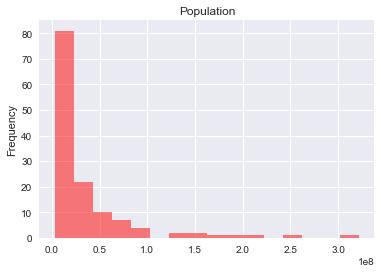

In [822]:
gapminder_df['Population'].drop(['China', 'India']).plot.hist(color='r', alpha=0.5, bins=16, title='Population')

> The distribution of population is very right skewed! over 80 out of 135 countries have less than 23 million population, while the average population is 34 million. 

#### Median Age
> The Median Age range is 32 years; In a histogram with 16 bins, we can see the frequencies for every 2 years increase in Median Age.

In [823]:
gapminder_df['MedianAge'].max() - gapminder_df['MedianAge'].min()

31.757999999999996

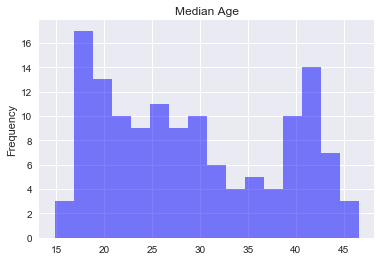

In [824]:
gapminder_df['MedianAge'].plot.hist(color='b', alpha=0.5, bins=16, title='Median Age')

> The distribution is **bimodal**, with two peaks: 30 countries with 17-21, and 24 countries with 39-43 Median Age

#### Life Expectancy
> The Life Expectancy range is 34 years; In a histogram with 7 bins, we can see the frequencies for almost every 5 years increase in Median Age. 

In [825]:
gapminder_df['LifeExpect'].max() - gapminder_df['LifeExpect'].min()

34.130000000000003

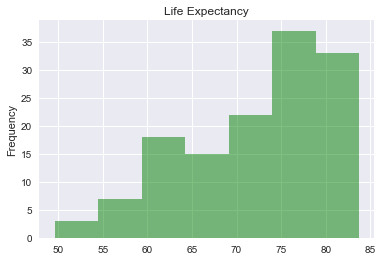

In [826]:
gapminder_df['LifeExpect'].plot.hist(color='g', alpha=0.5, bins=7,title='Life Expectancy')

> The distribution is left-skewd, with a peak of 39 countries for 74-79 years of life expectancy. 

#### Income
> In a histogram with 7 bins, we can see the frequencies for almost every 4000$ increase in Income.

In [827]:
gapminder_df['Income'].max() - gapminder_df['Income'].min()

82034.0

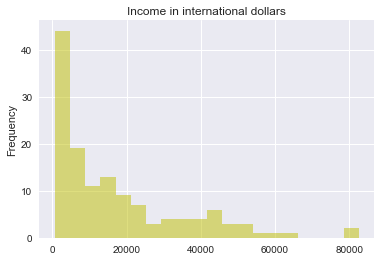

In [828]:
gapminder_df['Income'].plot.hist(color='y', alpha=0.5, bins=20, title='Income in international dollars')

> The distribution is right-skewed, with a peak of 43 countries for 600-4600$ range. it means almost one third of the countries have an income less than 4600 dollars per year per person

### What is the state of different regions of the world based on 'Median Age', 'Life Expectency',  'Income' and 'HDI'?

#### Median Age & Life Expectancy

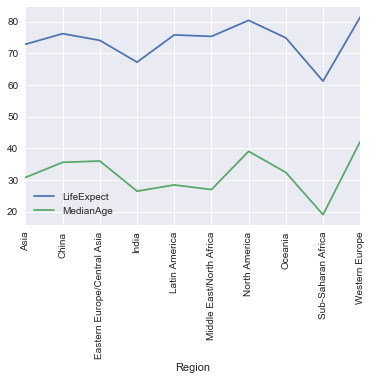

In [829]:
gapminder_df.groupby('Region')['LifeExpect', 'MedianAge'].mean().plot(kind='line',rot=90)

> 
* While China in both Median-Age and Life Expectancy is above the Asia level, India is below the Asia level in both of them
* The overall pattern of Median Age is same as that of Life Expectancy among the regions with two exceptions:
    * Eastern Europe/Central Asia: While the Median-Age(36.2) is well above the average(29.3), the Life-Expectancy(74) is just slightly above the average(72). 
    * Latin America: While the Median-Age(28.5) is below the average(29.3), the Life-Expectancy(76) is above the average(72). 
* In Sub-Saharan Africa both the Median-Age(19) and Life Expectancy(61.2) are more than 10 years below the average. The Median-Age in Sub-Saharan Africa is less than half of the both North America and Western Europe.

#### Income

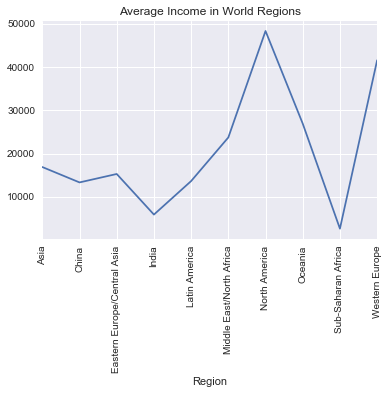

In [830]:
gapminder_df.groupby('Region')['Income'].mean().plot.line(title='Average Income in World Regions', rot=90)

> 
* Both China and India have lower Income levels than Asia
* India's average income(5903) is closer to Sub-Saharan Africa(2648) than Asia(16060)!
* The average income in North America is almost 2000% more than Sub-Saharan Africa: 48324 vs 2648$
* The income gap between North America-Western Europe and the rest of the world is huge. That's also true about Sub-Saharan Africa but in the opposite direction!

#### Human Development Index

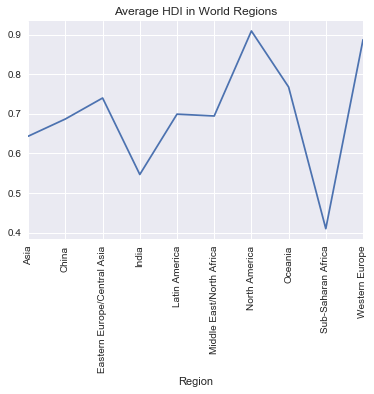

In [831]:
gapminder_df.groupby('Region')['HDI'].mean().plot(kind='line', rot=90, title='Average HDI in World Regions')

> 
* The pattern for HDI among different regions of the world is almost same as that of income. Part of it is because income is one of the three components of HDI index
* The biggest difference between HDI and Income Pattern is for Latin America; especially in compare with Middle East. While the Income level in Latin-America is far lower than Middle East (14000 vs 24000) the HDI index is almost the same (a little bit higher for Latin America!) 
* In HDI index in contrast with income, India is closer to Asia than Sub-Saharan Africa

#### Life Expectancy vs Income

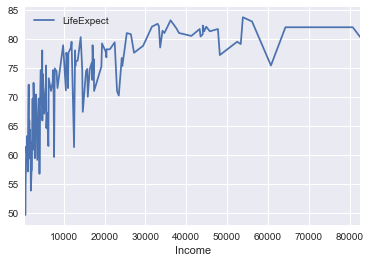

In [832]:
gapminder_df.sort_values('Income', axis=0).plot.line(x='Income', y= 'LifeExpect')

In [833]:
gapminder_df['LifeExpect'].corr(gapminder_df['Income'])

0.71430337980078529

> With income level less than 25000 the plot is quite noisy with lots of fluctuations; but in general, we can see a strong positive correlation between Income and Life Expectancy(0.7)

### What is the trend of health expenditure for top countries in HDI index from 1995 to 2010? Is there any significant difference with respect to health expenditure among these countries?

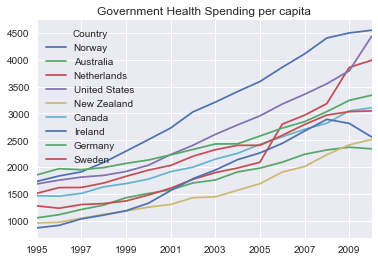

In [834]:
top10_hdi_gov_health_exp_df.transpose().plot.line(title='Government Health Spending per capita')

In [835]:
print top10_hdi_gov_health_exp_df['1995'].mean()
print top10_hdi_gov_health_exp_df['2010'].mean()

1375.61459077
3320.584053


In [836]:
print top10_hdi_gov_health_exp_df['2009']['United States'].mean()
print top10_hdi_gov_health_exp_df.drop('United States')['2009'].mean()

3794.852087
3159.79439525


> 
* Government Health Spending has been almost constantly increasing for all of these countries since 1995. While the average spending in 1995 is 1376, the same number for 2010 is 3320$, 2.4 times more
* US Government Health Spending per person is similar to other top countries in HDI index. In 2009, the US spending is 3795 and the average spending of others is 3160. Norway is the only country that its governmental health spending per person is more than US 
* US Government Health Spending increases significantly in 2009 by 17% and for the first time after 1995 catches up with Norway. This should be due to the adoption of 'Obama Care'  

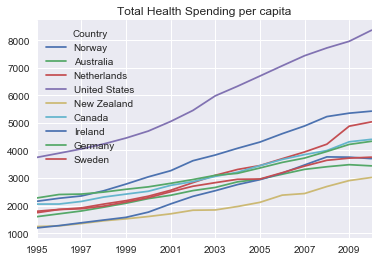

In [837]:
top10_hdi_total_health_exp_df.transpose().plot.line(title='Total Health Spending per capita')

In [838]:
print top10_hdi_total_health_exp_df['1995'].mean()
print top10_hdi_total_health_exp_df['2010'].mean()

1976.98306991
4609.2790602


In [839]:
print top10_hdi_total_health_exp_df['2009']['United States']
print top10_hdi_total_health_exp_df.drop('United States')['2009'].mean()

7959.95353756
4079.4743388


> 
* Total Health Spending has been almost constantly increasing for all of these countries since 1995. While the average spending in 1995 is 1977$, the same number for 2010 is 4609, 2.3 times more
* Although since 1995 US Government Health Spending per person is almost equal to others, there is a huge difference between US and others when it comes to Total Health Spending per capita. In 2009, the US total spending per person is 7960 while the average spending of others is 4079. In other worlds, while US Government Health spending in 2009 is just 20% more than average spending of others, the US Total Health spending per person is 95% more than average total spending of others (almost twice)!
* the gap between US and others has been steadily increasing since 2001

<a id='conclusions'></a>
## Conclusions

### Limitations of this analysis
> 
* The number of countries and territories are limited to those for which the Population and Median-Age is available, and also those with population more than 3 million. Therefore, the results are limited to 135 countries. In other words, the data for more than half of the countries and territories (140 out of 275) have not been considered in our investigation. 
* Putting 135 countries into 10 groups, based on geographical regions, makes the comparison much easier; however, the diversity inside each group is compromised. For instance, although South Africa is in Sub-Saharan Africa, its variables are closer to the countries in Asia than most of the other countries in Sub-Saharan Africa!
* In some cases, especially when we talk about domestic issues, more parameters are required. For example, when I talk about inequalities between rural and urban areas in China and India, or inefficiency of the US health system, other variables like ‘Gini coefficient’, ‘Insurance rate’, ‘Insurance coverage’, and ‘Prescription drug prices’ must be taken into consideration. But, these parameters are beyond the scope of this analysis. 
* Almost all of the results are based on descriptive statistics

### Summary of the results
Summary of the results and conclusions is presented in three different sections, according to the three main questions of this analysis: Distribution, Regional Differences, and Health Spending

### Distribution
> This is how the distribution of our variables are among the 135 world countries with population more than 3 million: 
* **Population**: Right-Skewed (mean= 54M median= 16M mode= 0-10M)
* **Median Age**: Bimodal (mean = 29Y, median=28Y, mode1=17-21Y mode2= 39-43Y)
* **Life Expectancy**: Left-Skewed (mean=72Y median=74Y mode= 74-79Y)
* **Income**: Right-Skewed (mean=17K median=11K, mode= 600-4.6K)


### Regional Differences 
#### Median Age & Life Expectancy
> 
* While China in both Median-Age and Life Expectancy is above the Asia level, India is below the Asia level in both of them
* The overall pattern of 'Median Age' among the regions is same as that of 'Life Expectancy' with two exceptions: 'Eastern Europe/Central Asia' and 'Latin America'. in Eastern Europe/Central Asia while the population is already old, the expected life is short! In contrast, 'Latin America' has a young population with decent life expectancy.
* in Sub-Saharan Africa population is extremely young and the life expectancy is quite short

#### Income
> 
* Both China and India have lower Income levels than Asia. Specially for India the average income is closer to Sub-Saharan Africa than Asia! Part of this could be because of their huge population. The other reason could be the high degree of income inequality between rural and urban regions of these two countries. (Investigating the **Gini Coefficient** could be helpful) 
* The income gap between North America-Western Europe and the rest of the world is huge; this is also true about Sub-Saharan Africa but in the opposite direction!

#### HDI
>  
* The pattern for HDI among different regions of the world is almost same as that of income. Part of this is because income is one of the three components of HDI index
* The biggest difference between HDI and Income pattern is for Latin America; especially in compare with Middle East. While the Income level in Latin-America is far lower than Middle East (14000 vs 24000) the HDI index is a little bit higher for Latin America! It means, Although Latin Americans make far less money than Middle East, when it comes to Life-Expectancy and Education (other 2 components of HDI) the distance is well compensated.
* The HDI index for Sub-Saharan Africa is less than half of the HDI index for North America 

#### Life Expectancy vs Income
> 
* There is a strong positive correlation between 'Income' and 'Life Expectancy' among the countries of the world

### Health Spending
> 
* Although US Government Health Spending per person is almost equal to others, the total health spending per person is US is twice as much as the other top 8 countries in the HDI index. At the same time, life expectancy in US is less than all of these countries. This clearly shows that the efficiency of health system in US is lower than others. And since the private sector is in charge of huge differences between governmental spending and the total spending, it means, for the most part, the blame is on the private health system (e.g. insurance and pharmaceutical companies)
